In [1]:
import functions as f
import parameters as p
import run_statistics as stats
import train_network

import network
import os

Device: cuda
-- Data Parameters --
using Resolution: 224
using # actions: 25
-- Training Parameters --
using training data: E:\ILSVRC2017\nofoveation\train
using test data: E:\ILSVRC2017\nofoveation\test
using q-table for training data: Q_tables\Q_table_strongfoveated.csv
using q-table for test data: Q_tables\Q_table_strongfoveated.csv
using batch size: 32
using # epochs: 100


In [2]:
paths = os.listdir(p.CHECKPOINT_DIR)
print(paths)

['01-02-2020 new params second data', '30-01-2020 default everything', '30-01-2020 train_second test_second', '31-01-2020 train_first test_second', '31-01-2020 trying out new params', '31-01-2020 VGG train_first test_first', 'checkpoint_0.pt']


In [3]:
m = network.DQN(p.RESOLUTION, p.RESOLUTION, p.N_ACTIONS)
m.to(p.DEVICE)
loader_test, idx_to_class = f.loader(p.DATA_PATH_TEST, transform=p.TRANSFORM, batch_size=p.BATCH_SIZE, shuffle=False)

In [4]:
def process_run(m, path):
    run = f.Run(p.CHECKPOINT_DIR + '\\{}'.format(path))
    run.plot_loss()
    print(run.lowest_validation(5))

    start_epoch, m = f.load_checkpoint(run.get_checkpoint(str(run.lowest_validation(5).index[1])), m)
    m.eval()
    #random_losses = stats.generate_random(idx_to_class, loader_test)
    #predicted_losses, target_losses, center_locations = stats.generate_predictions(idx_to_class, loader_test, m)
    #stats.print_results(predicted_losses, target_losses)
    train_network.validate_model(m, loader_test, idx_to_class)

using: E:\Dropbox\Documents\Year4\BachelorThesis\UsingASecondaryNetworkForFoveationInComputerVision\checkpoints\31-01-2020 trying out new params 
 reading results from E:\Dropbox\Documents\Year4\BachelorThesis\UsingASecondaryNetworkForFoveationInComputerVision\checkpoints\31-01-2020 trying out new params\results.txt


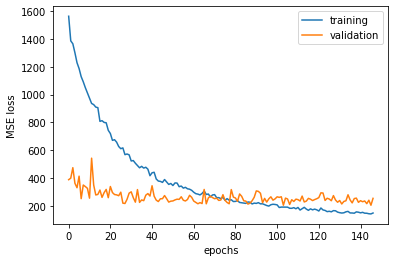

     validation    training
145  205.121300  142.732296
103  205.182991  191.940434
106  210.721468  183.492313
86   213.205021  228.543712
131  214.121127  148.995840


  0%|                                                                | 0/16 [00:00<?, ?it/s]

loading checkpoint
validating ...


100%|███████████████████████████████████████████████████████| 16/16 [00:10<00:00,  1.47it/s]

running [validation] loss over 16 batches 205.1829907390919
actions: [(0, 9), (1, 1), (2, 3), (5, 1), (6, 18), (7, 110), (8, 1), (10, 11), (11, 205), (12, 13), (13, 50), (14, 1), (15, 16), (16, 28), (17, 23), (18, 4), (19, 3), (21, 3)]

 === predicted vs target ===
Better performance of the network then center on the 500 test images: 46.4%
Equal performance of the network then center on the 500 test images: 2.6%
Worse performance of the network then center on the 500 test images: 51.0%
WilcoxonResult(statistic=58865.5, pvalue=0.8598817219302982)


In [5]:
process_run(m, paths[4])

using: E:\Dropbox\Documents\Year4\BachelorThesis\UsingASecondaryNetworkForFoveationInComputerVision\checkpoints\01-02-2020 new params second data 
 reading results from E:\Dropbox\Documents\Year4\BachelorThesis\UsingASecondaryNetworkForFoveationInComputerVision\checkpoints\01-02-2020 new params second data\results.txt


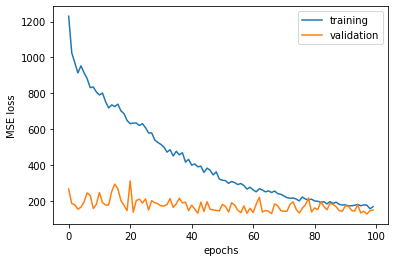

    validation    training
97  125.990051  175.001502
66  127.358498  245.385501
58  129.854542  264.722900
42  130.133636  389.227795
75  130.868266  198.307964


  0%|                                                                | 0/16 [00:00<?, ?it/s]

loading checkpoint
validating ...


100%|███████████████████████████████████████████████████████| 16/16 [00:09<00:00,  1.61it/s]

running [validation] loss over 16 batches 252.23944510412048
actions: [(0, 20), (1, 11), (5, 14), (6, 162), (7, 35), (11, 6), (12, 101), (16, 11), (17, 105), (18, 21), (19, 8), (23, 6)]

 === predicted vs target ===
Better performance of the network then center on the 500 test images: 30.6%
Equal performance of the network then center on the 500 test images: 20.2%
Worse performance of the network then center on the 500 test images: 49.2%
WilcoxonResult(statistic=29224.0, pvalue=3.629757962907181e-06)


In [6]:
process_run(m, paths[0])